In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    calinski_harabasz_score,
    davies_bouldin_score,
    silhouette_samples,
    silhouette_score,
)

In [2]:
df = pd.read_csv("../../../Datasets/ClusterPoints.csv")
df.head()

,X,Y
0,33,43
1,48,10
2,15,32
3,41,16
4,47,11


In [3]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
silhouette_s = []
for k in range(2, 11):
    gm = GaussianMixture(n_components=k)
    cluster_labels = gm.fit_predict(df)
    silhouette.append(silhouette_score(df, cluster_labels))
    calinski_harabasz.append(calinski_harabasz_score(df, cluster_labels))
    davies_bouldin.append(davies_bouldin_score(df, cluster_labels))
    silhouette_s.append(silhouette_samples(df, cluster_labels))

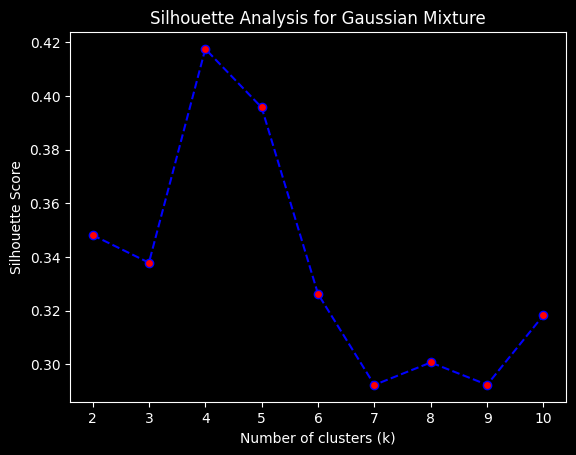

In [4]:
plt.plot(
    range(2, 11),
    silhouette,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Gaussian Mixture")
plt.show()

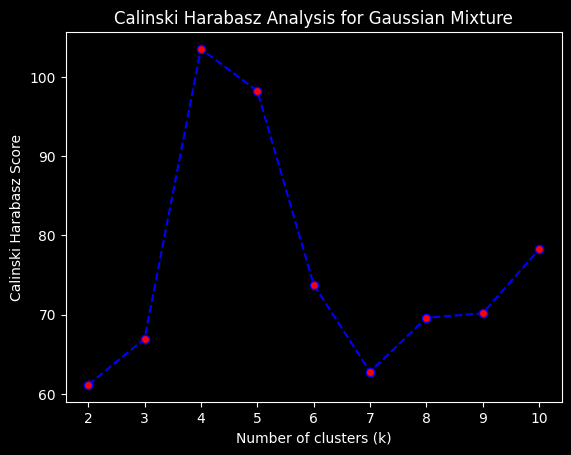

In [5]:
plt.plot(
    range(2, 11),
    calinski_harabasz,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski Harabasz Score")
plt.title("Calinski Harabasz Analysis for Gaussian Mixture")
plt.show()

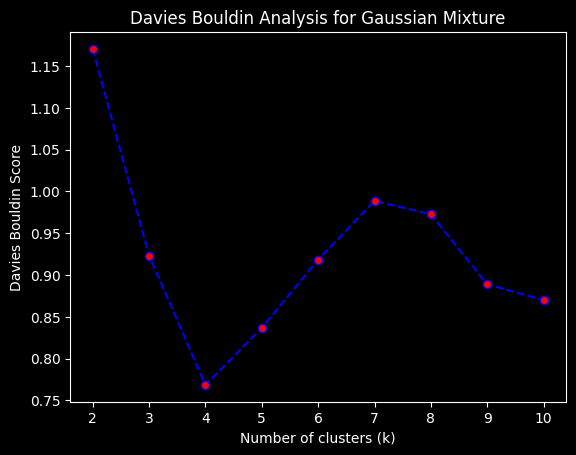

In [6]:
plt.plot(
    range(2, 11),
    davies_bouldin,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies Bouldin Score")
plt.title("Davies Bouldin Analysis for Gaussian Mixture")
plt.show()

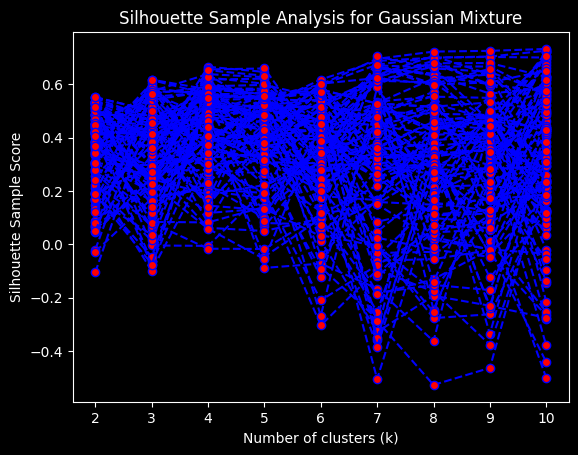

In [7]:
plt.plot(
    range(2, 11),
    silhouette_s,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Sample Score")
plt.title("Silhouette Sample Analysis for Gaussian Mixture")
plt.show()

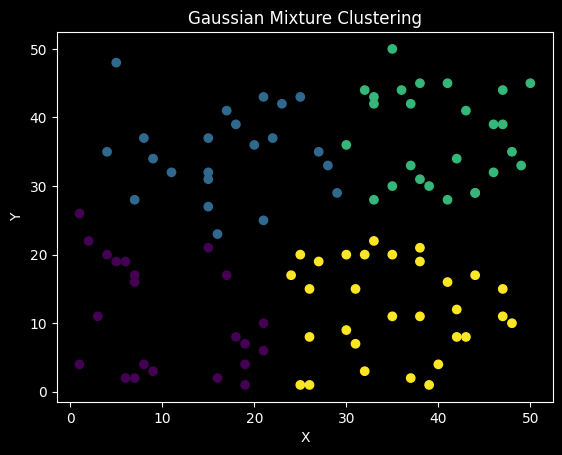

In [8]:
gm = GaussianMixture(n_components=4)
cluster_labels = gm.fit_predict(df)
plt.scatter(df["X"], df["Y"], c=cluster_labels)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gaussian Mixture Clustering")
plt.show()

In [9]:
print("Silhouette Score :", silhouette_score(df, cluster_labels))
print("Calinski Harabasz Score :", calinski_harabasz_score(df, cluster_labels))
print("Davies Bouldin Score :", davies_bouldin_score(df, cluster_labels))
print("Silhouette Samples :", silhouette_samples(df, cluster_labels))

Silhouette Score : 0.4174859988046308
Calinski Harabasz Score : 103.55497808995095
Davies Bouldin Score : 0.7685735728615606
Silhouette Samples : [ 0.39191395  0.47568854  0.58763597  0.49166692  0.48638778  0.1995517
  0.58374515  0.51069775  0.1450302   0.56945664  0.36737839  0.63747433
  0.521082    0.57060555  0.20674692  0.56093311  0.39562905  0.49020566
  0.66500889  0.2666972   0.43854975  0.59180301  0.46691927 -0.00581446
  0.60848676  0.18746333  0.65503538  0.45298647  0.33663804  0.55814717
  0.54134413  0.57398178  0.2237761   0.50462714  0.62488676  0.31333289
  0.39350738  0.54071276  0.40951521  0.08054143  0.34934483  0.3007697
  0.57217971  0.63559173  0.38258589  0.54623504  0.1470448   0.47559366
  0.39152338  0.17230843  0.53063837  0.55761907  0.38894834  0.37051023
  0.59285512  0.61686813  0.38537695  0.36630198  0.27915175  0.5916865
  0.15882203  0.40857432  0.30022783  0.46905758  0.32452706  0.58837005
  0.23553434  0.29911001  0.52404957  0.06190759  0.34

In [10]:
dump(gm, "../../../Models/GaussianMixture.joblib")

['../../../Models/GaussianMixture.joblib']